In [2]:
import xarray as xr
import numpy as np
# import pandas as pd
from matplotlib import pyplot as plt
import glob

In [4]:
directory = r"C:\Users\salla\OneDrive - University of Toronto\Desktop\School Information\NSERC\NSERC\O3_ANALYSIS\PEARL_FTIR\groundbased_ftir.o3_utoronto001_eureka.pearl_20070225t172644z_20071016t182733z_004.hdf"

path = directory

f = xr.open_mfdataset(
    path,
    combine="nested",
    concat_dim="idx",
    engine="netcdf4",
    decode_cf=True
)

In [33]:
f

<xarray.Dataset> Size: 9MB
Dimensions:                                                                    (
                                                                                idx: 1,
                                                                                fakeDim0: 320,
                                                                                fakeDim1: 1,
                                                                                fakeDim2: 1,
                                                                                fakeDim3: 1,
                                                                                ...
                                                                                fakeDim37: 320,
                                                                                fakeDim38: 320,
                                                                                fakeDim39: 320,
                                                                                fakeDim40: 47,
                                                                                fakeDim41: 320,
                                                                                fakeDim42: 1)
Dimensions without coordinates: idx, fakeDim0, fakeDim1, fakeDim2, fakeDim3,
                                fakeDim4, fakeDim5, fakeDim6, fakeDim7,
                                fakeDim8, fakeDim9, fakeDim10, fakeDim11,
                                fakeDim12, fakeDim13, fakeDim14, fakeDim15,
                                fakeDim16, fakeDim17, fakeDim18, fakeDim19,
                                fakeDim20, fakeDim21, fakeDim22, fakeDim23,
                                fakeDim24, fakeDim25, fakeDim26, fakeDim27,
                                fakeDim28, fakeDim29, fakeDim30, fakeDim31,
                                fakeDim32, fakeDim33, fakeDim34, fakeDim35,
                                fakeDim36, fakeDim37, fakeDim38, fakeDim39,
                                fakeDim40, fakeDim41, fakeDim42
Data variables: (12/28)
    DATETIME                                                                   (idx, fakeDim0) float64 3kB dask.array<chunksize=(1, 320), meta=np.ndarray>
    LATITUDE.INSTRUMENT                                                        (idx, fakeDim1) float32 4B dask.array<chunksize=(1, 1), meta=np.ndarray>
    LONGITUDE.INSTRUMENT                                                       (idx, fakeDim2) float32 4B dask.array<chunksize=(1, 1), meta=np.ndarray>
    ALTITUDE.INSTRUMENT                                                        (idx, fakeDim3) float32 4B dask.array<chunksize=(1, 1), meta=np.ndarray>
    SURFACE.PRESSURE_INDEPENDENT                                               (idx, fakeDim4) float32 1kB dask.array<chunksize=(1, 320), meta=np.ndarray>
    SURFACE.TEMPERATURE_INDEPENDENT                                            (idx, fakeDim5) float32 1kB dask.array<chunksize=(1, 320), meta=np.ndarray>
    ...                                                                         ...
    O3.COLUMN_ABSORPTION.SOLAR_UNCERTAINTY.SYSTEMATIC.STANDARD                 (idx, fakeDim36) float32 1kB dask.array<chunksize=(1, 320), meta=np.ndarray>
    ANGLE.SOLAR_ZENITH.ASTRONOMICAL                                            (idx, fakeDim37) float32 1kB dask.array<chunksize=(1, 320), meta=np.ndarray>
    ANGLE.SOLAR_AZIMUTH                                                        (idx, fakeDim38) float32 1kB dask.array<chunksize=(1, 320), meta=np.ndarray>
    H2O.MIXING.RATIO.VOLUME_ABSORPTION.SOLAR                                   (idx, fakeDim39, fakeDim40) float32 60kB dask.array<chunksize=(1, 320, 47), meta=np.ndarray>
    H2O.COLUMN_ABSORPTION.SOLAR                                                (idx, fakeDim41) float32 1kB dask.array<chunksize=(1, 320), meta=np.ndarray>
    SOURCE.PRODUCT                                                             (idx, fakeDim42) |S103 103B dask.array<chunksize=(

In [5]:
AVKS = f["O3.MIXING.RATIO.VOLUME_ABSORPTION.SOLAR_AVK"].values

In [31]:
profile_AVK = AVKS[0]
column_AVK = np.nansum(profile_AVK, axis = 1)
print(column_AVK[0].shape)
column_AVK[0]

(47,)


array([2.23293246e-05, 3.91238209e-05, 2.06096767e-04, 8.69680953e-04,
       2.95523182e-03, 8.98522139e-03, 2.70686224e-02, 6.08619191e-02,
       1.04018845e-01, 1.51966631e-01, 1.95633620e-01, 2.34776676e-01,
       2.74483770e-01, 3.15615386e-01, 3.59378546e-01, 4.06792849e-01,
       4.56758648e-01, 5.20488799e-01, 5.96576452e-01, 6.80091858e-01,
       7.60280013e-01, 8.44910741e-01, 9.18423831e-01, 9.83328521e-01,
       1.04928184e+00, 1.09945297e+00, 1.15601671e+00, 1.16193533e+00,
       1.12745774e+00, 1.06332803e+00, 9.64165151e-01, 8.63166451e-01,
       7.42950797e-01, 5.94063401e-01, 4.84725356e-01, 4.45110053e-01,
       4.85154301e-01, 5.72080195e-01, 6.90930724e-01, 8.34103823e-01,
       9.68771219e-01, 1.10541654e+00, 1.20614970e+00, 1.28170490e+00,
       1.34850168e+00, 1.36973965e+00, 1.37271392e+00], dtype=float32)

In [48]:
np.fliplr(profile_AVK[0]).trace()

np.float32(0.44473344)

In [32]:
OG_column_AVK = f["O3.COLUMN_ABSORPTION.SOLAR_AVK"].values
print(OG_column_AVK[0][0].shape)
OG_column_AVK[0][0]

(47,)


array([0.525664  , 0.13313764, 0.1783725 , 0.2380255 , 0.3095726 ,
       0.42732129, 0.5464236 , 0.632301  , 0.67971826, 0.67602503,
       0.63373613, 0.5961335 , 0.5750528 , 0.57661825, 0.5940891 ,
       0.6184372 , 0.6441664 , 0.67133266, 0.70093733, 0.73341095,
       0.7690405 , 0.80756027, 0.84681827, 0.88591456, 0.92729175,
       0.9713982 , 1.0222838 , 1.0493709 , 1.0538509 , 1.0359514 ,
       1.006186  , 0.97300637, 0.9339274 , 0.8686822 , 0.8199185 ,
       0.81894726, 0.86272454, 0.9322586 , 1.0117623 , 1.0872128 ,
       1.152712  , 1.1985577 , 1.223729  , 1.2287934 , 1.2036557 ,
       1.1624607 , 1.1105214 ], dtype=float32)

In [35]:
np.mean(OG_column_AVK[0][0] - column_AVK[0])

np.float32(0.16518207)

In [ ]:
valid_alt_idxs_list = []
for i, measurement in enumerate(AVKS):
    tot_sensitivity = np.nansum(measurement, axis=1)
    valid_alt_idxs = np.where(tot_sensitivity >= 0.5)[0]
    valid_alt_idxs_list.append(valid_alt_idxs)

In [ ]:
valid_alt_idxs_list

[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]),
 array([ 1,  2

In [ ]:
import heapq
heapq.nsmallest(50, valid_alt_idxs_list)

[np.int64(19),
 np.int64(19),
 np.int64(19),
 np.int64(19),
 np.int64(19),
 np.int64(19),
 np.int64(19),
 np.int64(19),
 np.int64(19),
 np.int64(19),
 np.int64(19),
 np.int64(19),
 np.int64(19),
 np.int64(19),
 np.int64(19),
 np.int64(19),
 np.int64(19),
 np.int64(19),
 np.int64(19),
 np.int64(19),
 np.int64(19),
 np.int64(19),
 np.int64(19),
 np.int64(19),
 np.int64(19),
 np.int64(20),
 np.int64(20),
 np.int64(20),
 np.int64(20),
 np.int64(20),
 np.int64(20),
 np.int64(20),
 np.int64(20),
 np.int64(20),
 np.int64(20),
 np.int64(20),
 np.int64(21),
 np.int64(21),
 np.int64(21),
 np.int64(22),
 np.int64(24),
 np.int64(26),
 np.int64(29),
 np.int64(29),
 np.int64(29),
 np.int64(29),
 np.int64(30),
 np.int64(30),
 np.int64(30),
 np.int64(30)]

In [ ]:
f["altitude1"]

<xarray.DataArray 'altitude1' (altitude1: 47)> Size: 188B
array([  0.8121  ,   1.2372  ,   1.7041  ,   2.2078  ,   2.74825 ,   3.33045 ,
         3.94945 ,   4.60525 ,   5.2978  ,   6.0271  ,   6.7982  ,   7.6061  ,
         8.4508  ,   9.332251,  10.25045 ,  11.21    ,  12.205   ,  13.235001,
        14.3     ,  15.4     ,  16.54    ,  17.715   ,  18.925   ,  20.17    ,
        21.45    ,  22.77    ,  24.125   ,  25.515   ,  26.939999,  28.4     ,
        29.915   ,  31.529999,  33.3     ,  35.285   ,  37.555   ,  40.17    ,
        43.190002,  46.68    ,  50.699997,  55.315   ,  60.59    ,  66.585   ,
        73.384995,  81.1     ,  89.85    , 100.25    , 113.      ],
      dtype=float32)
Coordinates:
  * altitude1  (altitude1) float32 188B 0.8121 1.237 1.704 ... 89.85 100.2 113.0

In [ ]:
AVK1 = AVKS[0]
AVK2 = AVKS[1]
AVK3 = AVKS[2]
AVK4 = AVKS[3]

In [ ]:
np.nansum(AVK2, axis = 1)


array([ 4.7602630e-01,  5.6624436e-01,  6.5379363e-01,  7.3096639e-01,
        7.9169315e-01,  8.3787048e-01,  8.6778629e-01,  8.8458490e-01,
        8.9371908e-01,  9.0563488e-01,  9.4351345e-01,  1.0505790e+00,
        1.2925289e+00,  1.7358075e+00,  2.3001204e+00,  2.6642625e+00,
        2.5975606e+00,  1.7728946e+00,  6.1824989e-01, -5.6540245e-01,
       -1.3126976e+00, -1.1306807e+00, -2.4500370e-01,  8.4757841e-01,
        1.6635855e+00,  2.0018127e+00,  1.9267101e+00,  1.9328560e+00,
        1.8142471e+00,  1.6296282e+00,  1.4262389e+00,  1.2191885e+00,
        1.0175525e+00,  8.3107501e-01,  8.7751269e-01,  6.9183576e-01,
        3.7188599e-01,  1.4427190e-01,  4.3011885e-02,  1.1326704e-02,
        2.7195346e-03,  4.4764188e-04,  2.0139169e-05,  2.5720703e-07,
       -4.4098471e-08,  5.1858251e-07,  7.6105877e-09], dtype=float32)

In [ ]:
np.nansum(AVK1, axis = 1)
#0.5 we should use as a stop threshold for sensitivity, so, sensitivites below 0.5 are disregarded

array([ 5.0724369e-01,  6.0294336e-01,  6.9524515e-01,  7.7584535e-01,
        8.3824503e-01,  8.8440490e-01,  9.1249520e-01,  9.2582315e-01,
        9.3002367e-01,  9.3575567e-01,  9.6627814e-01,  1.0640562e+00,
        1.2910612e+00,  1.7037214e+00,  2.2071202e+00,  2.4789138e+00,
        2.3081672e+00,  1.4458063e+00,  3.3813858e-01, -6.8281466e-01,
       -1.1739987e+00, -7.5246876e-01,  2.5876296e-01,  1.2925333e+00,
        1.9592175e+00,  2.1216559e+00,  1.9079047e+00,  1.8159646e+00,
        1.6357902e+00,  1.4262388e+00,  1.2280784e+00,  1.0510814e+00,
        8.9908850e-01,  7.7426994e-01,  8.8406801e-01,  7.6012570e-01,
        4.4281530e-01,  1.8420012e-01,  5.8334865e-02,  1.6241636e-02,
        4.1843560e-03,  7.9017325e-04,  4.8882914e-05,  1.2664182e-06,
        2.1185210e-06,  1.2726159e-06,  1.0134356e-08], dtype=float32)

Text(0.5, 1.0, 'Sensitivities for O$_3$ PEARL FTIR Measurements')

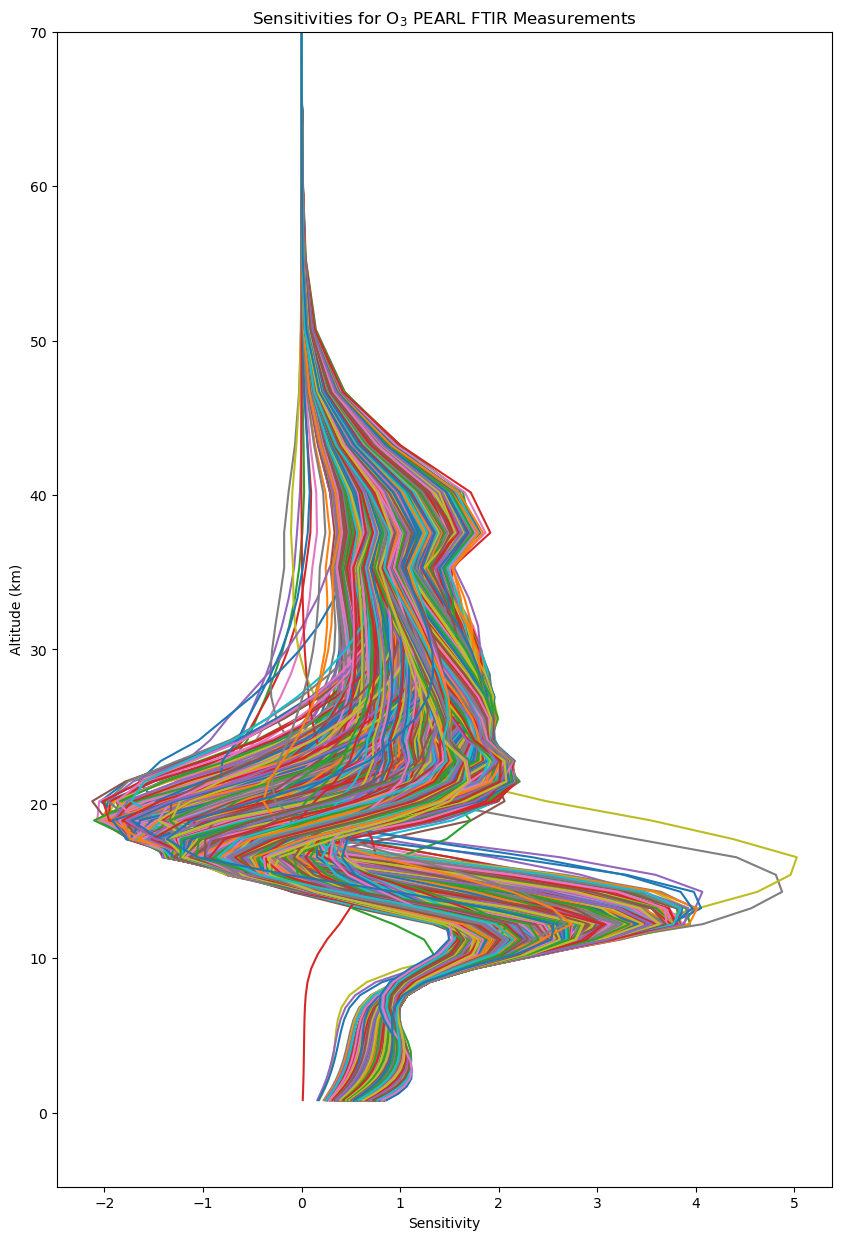

In [ ]:
plt.figure(figsize=(10, 15))
for avk in AVKS:
    plt.plot(np.nansum(avk, axis=1), f["altitude1"])

plt.ylim(top= 70)
plt.xlabel("Sensitivity")
plt.ylabel("Altitude (km)")
plt.title("Sensitivities for O$_3$ PEARL FTIR Measurements")


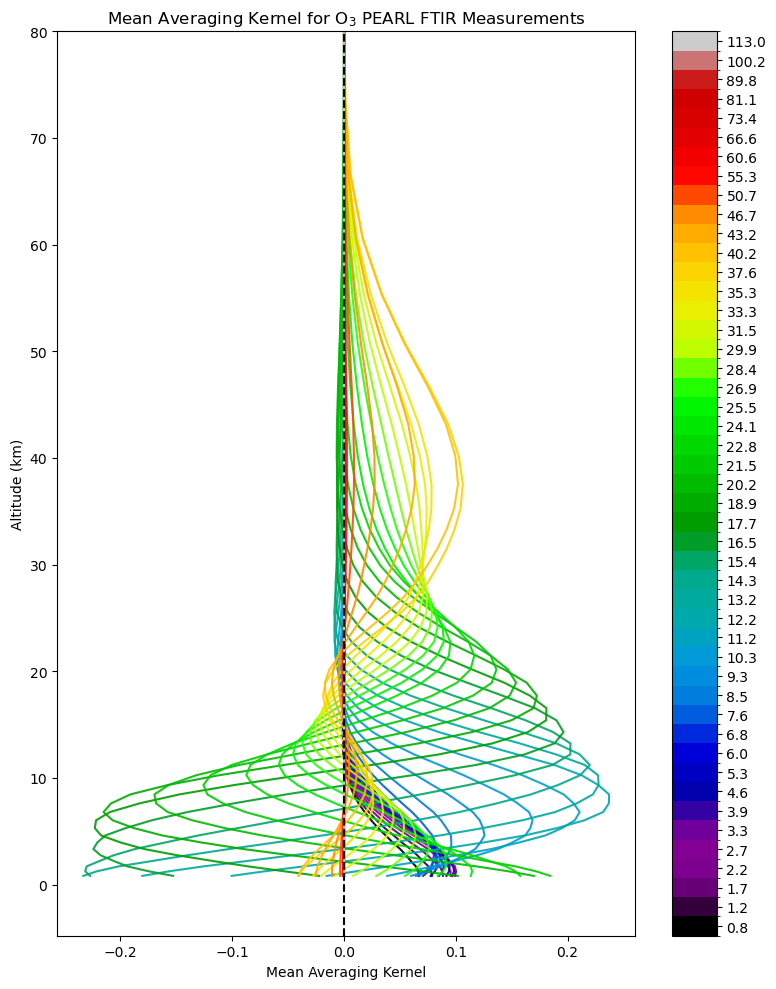

In [ ]:
mean_avk = np.nanmean(AVKS, axis = 0)
alts     = f["altitude1"].values[::-1]

fig, ax = plt.subplots(figsize=(8, 10))

cmap = plt.get_cmap("nipy_spectral", 47)
colors = cmap(np.arange(47))

for i in range(mean_avk.shape[0]):
    plt.plot(mean_avk[i, :], alts, color=colors[i], alpha = 0.9)

import matplotlib as mpl
from matplotlib.colors import ListedColormap, BoundaryNorm
bounds = np.unique(f["ALTITUDE.BOUNDARIES"][0].values.flatten())
lcmap = ListedColormap(colors)
norm = BoundaryNorm(bounds, lcmap.N)

sm = mpl.cm.ScalarMappable(cmap=lcmap, norm=norm)

cbar = fig.colorbar(sm, ax=ax,
                    boundaries=bounds,
                    ticks=alts,
                    spacing='uniform')

ymin, ymax = plt.ylim()
plt.plot([0, 0], [ymin, ymax], color='black', ls='dashed')
plt.ylim(ymin, 80)
ax.set_xlabel("Mean Averaging Kernel")
ax.set_ylabel("Altitude (km)")
ax.set_title("Mean Averaging Kernel for O$_3$ PEARL FTIR Measurements")
fig.tight_layout()

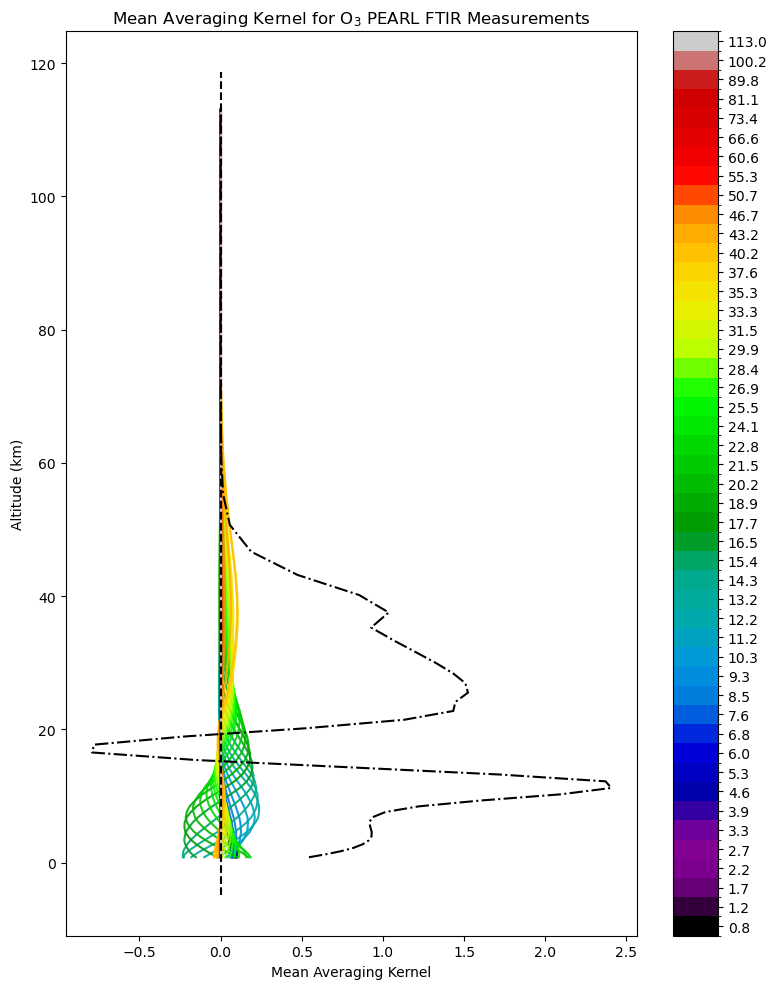

In [ ]:
mean_avk = np.nanmean(AVKS, axis = 0)
alts     = f["altitude1"].values[::-1]

fig, ax = plt.subplots(figsize=(8, 10))

cmap = plt.get_cmap("nipy_spectral", 47)
colors = cmap(np.arange(47))

for i in range(mean_avk.shape[0]):
    plt.plot(mean_avk[i, :], alts, color=colors[i], alpha = 0.9)

import matplotlib as mpl
from matplotlib.colors import ListedColormap, BoundaryNorm
bounds = np.unique(f["ALTITUDE.BOUNDARIES"][0].values.flatten())
lcmap = ListedColormap(colors)
norm = BoundaryNorm(bounds, lcmap.N)

sm = mpl.cm.ScalarMappable(cmap=lcmap, norm=norm)

cbar = fig.colorbar(sm, ax=ax,
                    boundaries=bounds,
                    ticks=alts,
                    spacing='uniform')

ymin, ymax = plt.ylim()
plt.plot([0, 0], [ymin, ymax], color='black', ls='dashed')
# plt.ylim(ymin, 80)

plt.plot(np.nansum(mean_avk, axis = 1), alts[::-1], color='black', ls='-.')

ax.set_xlabel("Mean Averaging Kernel")
ax.set_ylabel("Altitude (km)")
ax.set_title("Mean Averaging Kernel for O$_3$ PEARL FTIR Measurements")
fig.tight_layout()

In [ ]:
tot_col = np.nansum(AVKS, axis = 2)
tot_col.shape

(6261, 47)

In [ ]:
OG_tot_col = f["O3.COLUMN_ABSORPTION.SOLAR_AVK"].values
OG_tot_col[0]

array([0.9303265 , 0.9531981 , 0.97598076, 0.9976066 , 1.0162661 ,
       1.0325669 , 1.0455105 , 1.0535008 , 1.0558004 , 1.0509597 ,
       1.0370783 , 1.0115932 , 0.9753471 , 0.9340628 , 0.91633224,
       0.9526046 , 0.9856212 , 1.0114095 , 1.02607   , 1.0198436 ,
       1.0126857 , 1.0070262 , 1.001509  , 0.9943447 , 0.98264605,
       0.96722806, 0.9488971 , 0.9322365 , 0.918411  , 0.90858513,
       0.9067103 , 0.9163279 , 0.94136053, 0.98626524, 1.0505527 ,
       1.1339495 , 1.2233831 , 1.2778358 , 1.274464  , 1.1852028 ,
       0.8926687 , 0.4756022 , 0.16383944, 0.04798706, 0.10094682,
       0.32548752, 2.305602  ], dtype=float32)

In [ ]:
OG_tot_col.shape

(6261, 47)

In [ ]:
tot_col[0]

array([ 5.0724369e-01,  6.0294336e-01,  6.9524515e-01,  7.7584535e-01,
        8.3824503e-01,  8.8440490e-01,  9.1249520e-01,  9.2582315e-01,
        9.3002367e-01,  9.3575567e-01,  9.6627814e-01,  1.0640562e+00,
        1.2910612e+00,  1.7037214e+00,  2.2071202e+00,  2.4789138e+00,
        2.3081672e+00,  1.4458063e+00,  3.3813858e-01, -6.8281466e-01,
       -1.1739987e+00, -7.5246876e-01,  2.5876296e-01,  1.2925333e+00,
        1.9592175e+00,  2.1216559e+00,  1.9079047e+00,  1.8159646e+00,
        1.6357902e+00,  1.4262388e+00,  1.2280784e+00,  1.0510814e+00,
        8.9908850e-01,  7.7426994e-01,  8.8406801e-01,  7.6012570e-01,
        4.4281530e-01,  1.8420012e-01,  5.8334865e-02,  1.6241636e-02,
        4.1843560e-03,  7.9017325e-04,  4.8882914e-05,  1.2664182e-06,
        2.1185210e-06,  1.2726159e-06,  1.0134356e-08], dtype=float32)

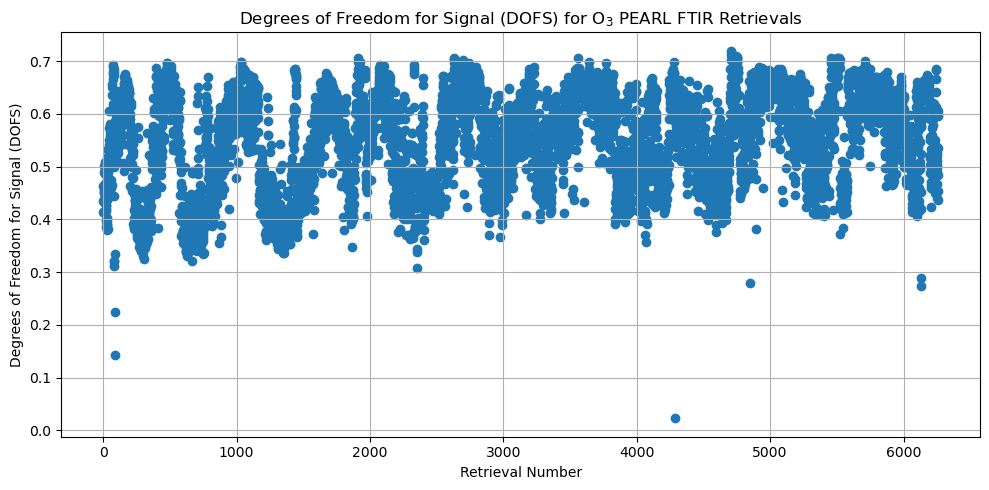

In [ ]:
diag_sums = [np.trace(avk) for avk in AVKS]

# 2. Make a single call to plot (here as a line + markers)
plt.figure(figsize=(10, 5))
plt.scatter(range(len(diag_sums)), diag_sums)
plt.title("Degrees of Freedom for Signal (DOFS) for O$_3$ PEARL FTIR Retrievals")
plt.xlabel("Retrieval Number")
plt.ylabel("Degrees of Freedom for Signal (DOFS)")
plt.grid(True)
plt.tight_layout()

In [ ]:
f["altitude1"].values

array([  0.8121   ,   1.2372   ,   1.7040999,   2.2078   ,   2.74825  ,
         3.33045  ,   3.94945  ,   4.6052504,   5.2978   ,   6.0271   ,
         6.7982   ,   7.6061   ,   8.4508   ,   9.332251 ,  10.25045  ,
        11.21     ,  12.205    ,  13.235001 ,  14.3      ,  15.4      ,
        16.54     ,  17.715    ,  18.925    ,  20.17     ,  21.45     ,
        22.77     ,  24.125    ,  25.515    ,  26.939999 ,  28.4      ,
        29.915    ,  31.529999 ,  33.3      ,  35.285    ,  37.555    ,
        40.17     ,  43.190002 ,  46.68     ,  50.699997 ,  55.315    ,
        60.59     ,  66.585    ,  73.384995 ,  81.1      ,  89.85     ,
       100.25     , 113.       ], dtype=float32)

In [ ]:
mean_avk.shape

(47, 47)

In [ ]:
np.unique(f["ALTITUDE.BOUNDARIES"][0].values.flatten())

array([  0.61  ,   1.0142,   1.4602,   1.948 ,   2.4676,   3.0289,
         3.632 ,   4.2669,   4.9436,   5.652 ,   6.4022,   7.1942,
         8.018 ,   8.8836,   9.7809,  10.72  ,  11.7   ,  12.71  ,
        13.76  ,  14.84  ,  15.96  ,  17.12  ,  18.31  ,  19.54  ,
        20.8   ,  22.1   ,  23.44  ,  24.81  ,  26.22  ,  27.66  ,
        29.14  ,  30.69  ,  32.37  ,  34.23  ,  36.34  ,  38.77  ,
        41.57  ,  44.81  ,  48.55  ,  52.85  ,  57.78  ,  63.4   ,
        69.77  ,  77.    ,  85.2   ,  94.5   , 106.    , 120.    ],
      dtype=float32)

In [ ]:
len(alts)

47

In [ ]:
f["ALTITUDE.BOUNDARIES"][0].values

array([[  1.0142,   1.4602,   1.948 ,   2.4676,   3.0289,   3.632 ,
          4.2669,   4.9436,   5.652 ,   6.4022,   7.1942,   8.018 ,
          8.8836,   9.7809,  10.72  ,  11.7   ,  12.71  ,  13.76  ,
         14.84  ,  15.96  ,  17.12  ,  18.31  ,  19.54  ,  20.8   ,
         22.1   ,  23.44  ,  24.81  ,  26.22  ,  27.66  ,  29.14  ,
         30.69  ,  32.37  ,  34.23  ,  36.34  ,  38.77  ,  41.57  ,
         44.81  ,  48.55  ,  52.85  ,  57.78  ,  63.4   ,  69.77  ,
         77.    ,  85.2   ,  94.5   , 106.    , 120.    ],
       [  0.61  ,   1.0142,   1.4602,   1.948 ,   2.4676,   3.0289,
          3.632 ,   4.2669,   4.9436,   5.652 ,   6.4022,   7.1942,
          8.018 ,   8.8836,   9.7809,  10.72  ,  11.7   ,  12.71  ,
         13.76  ,  14.84  ,  15.96  ,  17.12  ,  18.31  ,  19.54  ,
         20.8   ,  22.1   ,  23.44  ,  24.81  ,  26.22  ,  27.66  ,
         29.14  ,  30.69  ,  32.37  ,  34.23  ,  36.34  ,  38.77  ,
         41.57  ,  44.81  ,  48.55  ,  52.85  ,  57.78  ,

In [ ]:
O3_vmr = f["O3.MIXING.RATIO.VOLUME_ABSORPTION.SOLAR"] * 1e-6
O3_times = O3_vmr.sel(DATETIME = slice("2006-01-01", "2020-12-31"))
latitude = 80.05
longitude = -86.42
altitude1 = O3_times["altitude1"].values

In [ ]:
temperature = f["TEMPERATURE_INDEPENDENT"]
pressure = f["PRESSURE_INDEPENDENT"] * 100
k = 1.380649e-23
O3_density = O3_vmr * pressure/(k * temperature)
# vmr - mol o3/mol air
# mol o3/mol air * mol air/vol air = num density = vmr * mol air/vol air = mol o3/vol air in molecules/m^3
# mol air/vol air = N/V
# PV = NkT
# N/V = P/kT
# num density = vmr * N/V = vmr * P/kT
# column = num density*altitude diff

C:\Users\salla\AppData\Local\Temp\ipykernel_18560\2510374132.py:13: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.
  for i, ax in enumerate(has_fig.axes.flat):


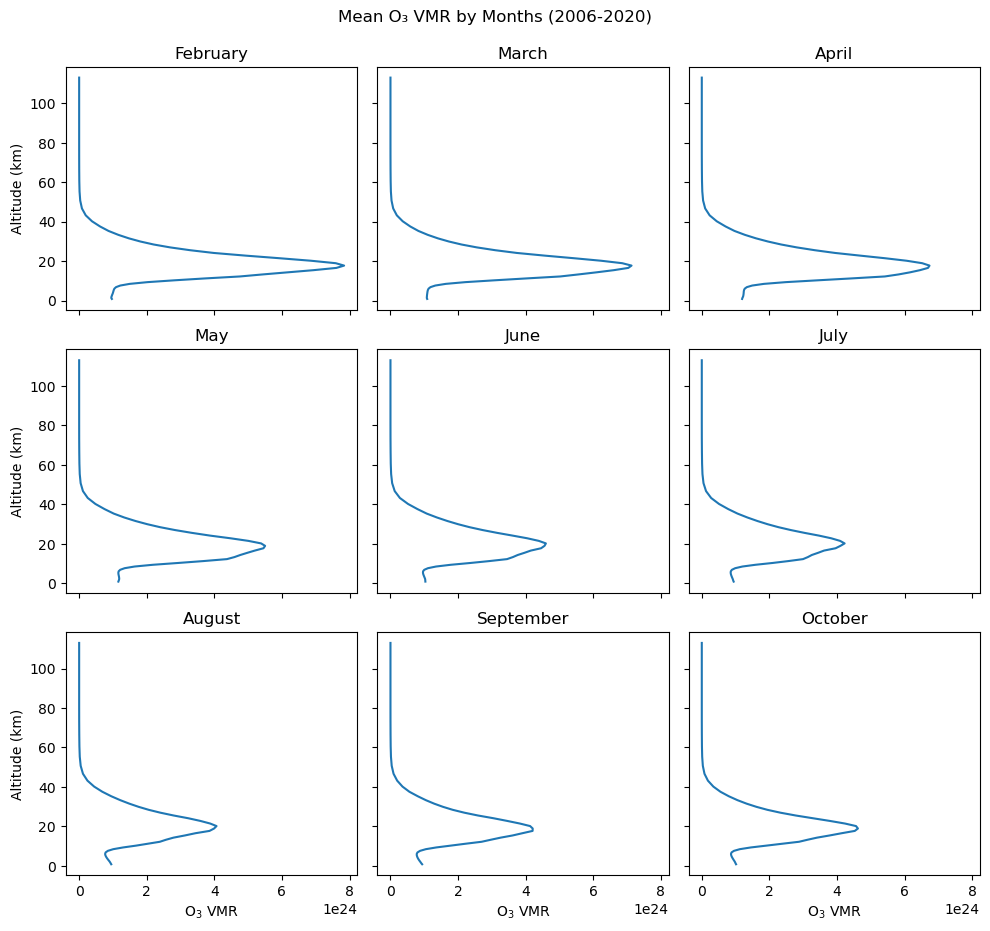

In [ ]:
has_fig = (((O3_times * pressure/(k * temperature)).groupby("DATETIME.month").mean(dim  = "DATETIME") * 10**6)).plot(col = "month", col_wrap = 3, y = "altitude1")
has_fig.fig.axes[0].set_ylabel("Altitude (km)")
has_fig.fig.axes[3].set_ylabel("Altitude (km)")
has_fig.fig.axes[6].set_ylabel("Altitude (km)")
has_fig.fig.axes[6].set_xlabel("O$_3$ VMR")
has_fig.fig.axes[7].set_xlabel("O$_3$ VMR")
has_fig.fig.axes[8].set_xlabel("O$_3$ VMR")

plt.suptitle("Mean O₃ VMR by Months (2006-2020)", y = 1.025)

month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

for i, ax in enumerate(has_fig.axes.flat):
    ax.set_title(month_names[i + 1])

title = has_fig.fig._suptitle.get_text()
has_fig.fig.savefig(title, bbox_inches="tight")

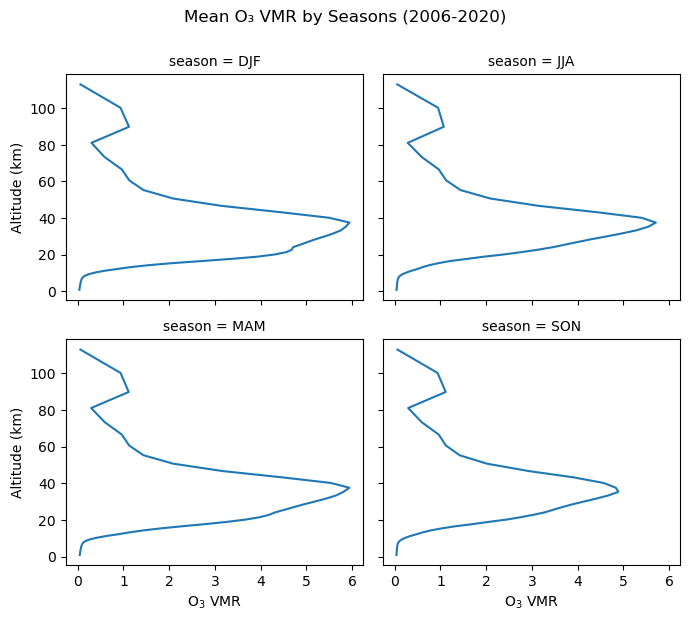

In [ ]:
has_fig = (O3_times.groupby("DATETIME.season").mean(dim  = "DATETIME") * 10**6).plot(col = "season", col_wrap = 2, y = "altitude1")
has_fig.fig.axes[0].set_ylabel("Altitude (km)")
has_fig.fig.axes[2].set_ylabel("Altitude (km)")
has_fig.fig.axes[2].set_xlabel("O$_3$ VMR")
has_fig.fig.axes[3].set_xlabel("O$_3$ VMR")

plt.suptitle("Mean O₃ VMR by Seasons (2006-2020)", y = 1.05)

title = has_fig.fig._suptitle.get_text()
has_fig.fig.savefig(title, bbox_inches="tight")

In [ ]:
altitude1

array([  0.8121   ,   1.2372   ,   1.7040999,   2.2078   ,   2.74825  ,
         3.33045  ,   3.94945  ,   4.6052504,   5.2978   ,   6.0271   ,
         6.7982   ,   7.6061   ,   8.4508   ,   9.332251 ,  10.25045  ,
        11.21     ,  12.205    ,  13.235001 ,  14.3      ,  15.4      ,
        16.54     ,  17.715    ,  18.925    ,  20.17     ,  21.45     ,
        22.77     ,  24.125    ,  25.515    ,  26.939999 ,  28.4      ,
        29.915    ,  31.529999 ,  33.3      ,  35.285    ,  37.555    ,
        40.17     ,  43.190002 ,  46.68     ,  50.699997 ,  55.315    ,
        60.59     ,  66.585    ,  73.384995 ,  81.1      ,  89.85     ,
       100.25     , 113.       ], dtype=float32)

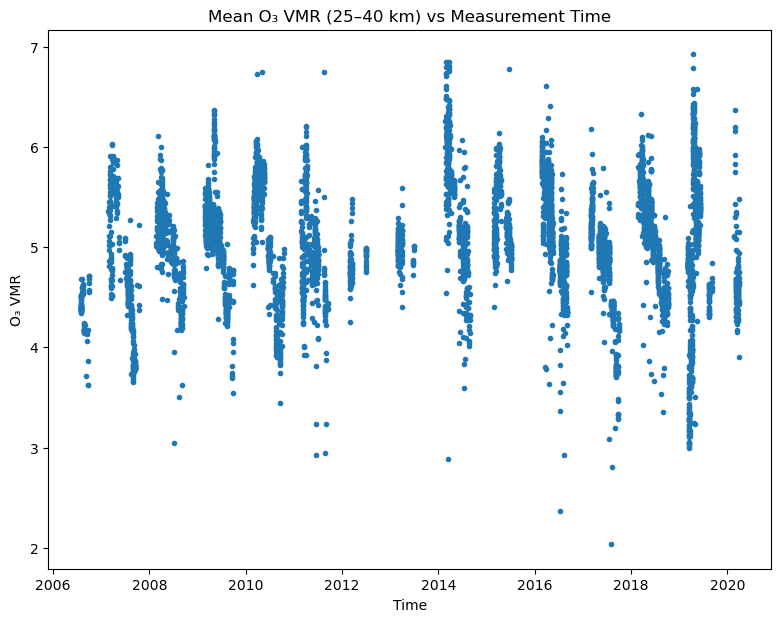

In [ ]:
(O3_times.sel(altitude1 = slice(25, 40)).mean(dim = "altitude1") * 10**6).plot(marker = ".", linestyle = "None", size = 7)

plt.ylabel("O₃ VMR")
plt.xlabel("Time")
plt.title("Mean O₃ VMR (25–40 km) vs Measurement Time")

fig = plt.gcf()
axes = plt.gca()

title = axes.get_title()
fig.savefig(title, bbox_inches="tight")

c:\Users\salla\anaconda3\Lib\site-packages\xarray\groupers.py:498: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


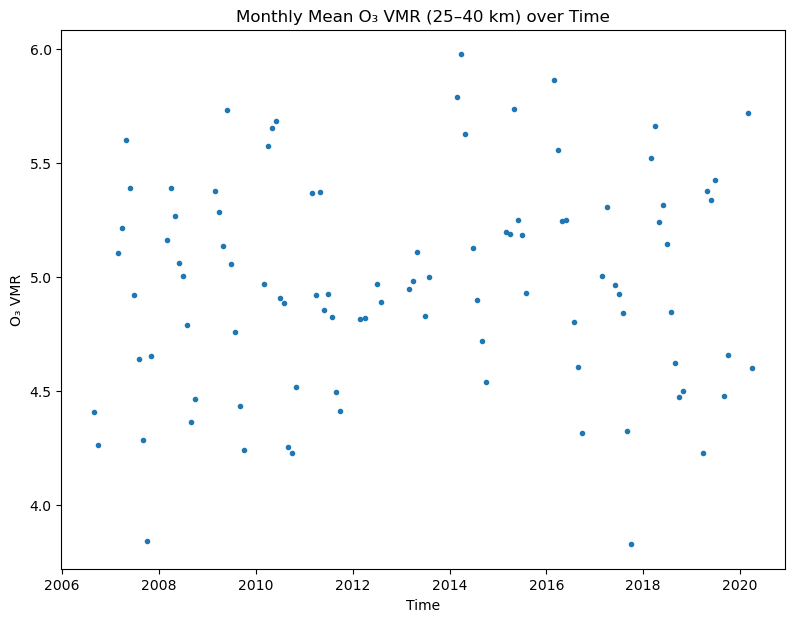

In [ ]:
(O3_times.sel(altitude1 = slice(25, 40)).resample(DATETIME = "1M").mean(dim = ["altitude1", "DATETIME"]) * 10**6).plot(marker = ".", linestyle = "None", size = 7)

plt.ylabel("O₃ VMR")
plt.xlabel("Time")
plt.title("Monthly Mean O₃ VMR (25–40 km) over Time")

fig = plt.gcf()
axes = plt.gca()

title = axes.get_title()
fig.savefig(title, bbox_inches="tight")

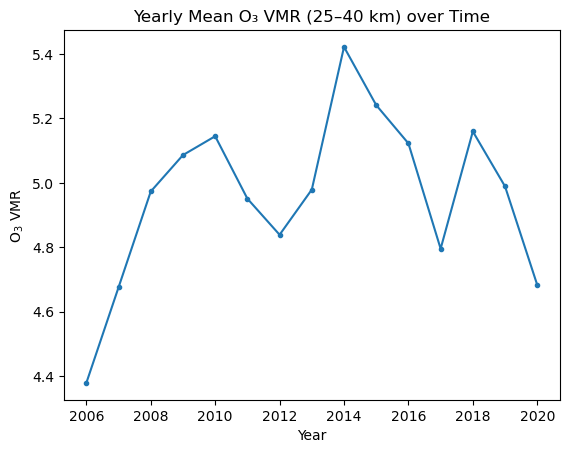

In [ ]:
has_fig = (O3_times.sel(altitude1 = slice(25, 40)).groupby("DATETIME.year").mean(dim = ["altitude1", "DATETIME"]) * 10**6).plot(marker = ".")
plt.xlabel("Year")
plt.ylabel("O$_3$ VMR")
plt.title("Yearly Mean O₃ VMR (25–40 km) over Time")

fig = plt.gcf()
axes = plt.gca()

title = axes.get_title()
fig.savefig(title, bbox_inches="tight")

In [ ]:
alt_boundaries = f["ALTITUDE.BOUNDARIES"][0]
lower_alt_bounds = alt_boundaries[1]
upper_alt_bounds = alt_boundaries[0]
alt_boundary_diffs = (upper_alt_bounds - lower_alt_bounds)
lower_alt_bounds = alt_boundaries[1].values
upper_alt_bounds = alt_boundaries[0].values

min_alt = 0
max_alt = 130
min_alt_bound = np.argmin(altitude1)
max_alt_bound = np.argmax(altitude1)
min_proportion = 0
max_proportion = 0
bottom_alt_bound = np.argmin(altitude1)
top_alt_bound = np.argmax(altitude1)
no_column = False

_min_lower_bounds = min(lower_alt_bounds)
_max_upper_bounds = max(upper_alt_bounds)

for i, (lower_bound, upper_bound) in enumerate(zip(lower_alt_bounds, upper_alt_bounds)):
    bound_diff = alt_boundary_diffs[i]
    if min_alt < _min_lower_bounds:
        pass
    elif lower_bound <= min_alt <= upper_bound:
        min_bound = upper_bound
        bottom_alt_bound = i-1
        min_proportion = (upper_bound - min_alt) / bound_diff
        min_alt_bound = i
    elif min_alt > _max_upper_bounds:
        no_column = True
        break
    if max_alt > _max_upper_bounds:
        pass
    elif lower_bound <= max_alt <= upper_bound:
        max_alt_bound = i
        top_alt_bound = i+1
        max_bound = lower_bound
        max_proportion = (max_alt - lower_bound) / bound_diff
    elif max_alt < _min_lower_bounds:
        no_column = True
        break

_top_slice = slice(max_alt_bound, top_alt_bound + 1)
_middle_slice = slice(min_alt_bound, max_alt_bound + 1)
_bottom_slice = slice(bottom_alt_bound, min_alt_bound + 1)

O3_column_top = (O3_density.isel(altitude1 = _top_slice) * alt_boundary_diffs.isel(altitude1 = _top_slice)) * max_proportion * 1000
O3_column = O3_density.isel(altitude1 = _middle_slice) * alt_boundary_diffs.isel(altitude1 = _middle_slice) * 1000
O3_column_bottom = (O3_density.isel(altitude1 = _bottom_slice) * alt_boundary_diffs.isel(altitude1 = _bottom_slice)) * min_proportion * 1000

_dim_name = "altitude1"
O3_partial_column = (O3_column_top.sum(dim = _dim_name) + O3_column.sum(dim = _dim_name) + O3_column_bottom.sum(dim = _dim_name)).where(not no_column, 0)

_conversion_factor = 2.687e20
O3_partial_column_DU = O3_partial_column / _conversion_factor

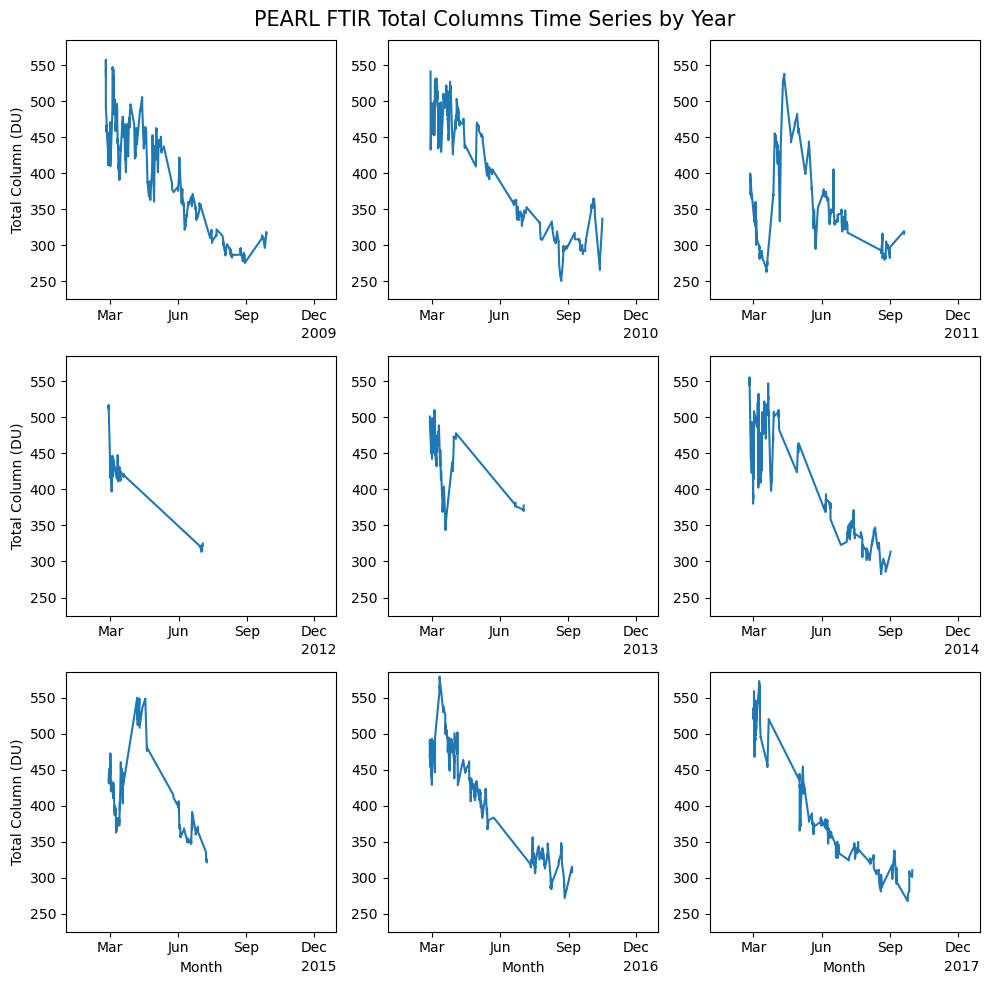

In [ ]:
import matplotlib.dates as mdates
fig, axes = plt.subplots(3,3, figsize = (10,10))
years = [str(year) for year in range(2009, 2018)]
for i, year in enumerate(years):
    flat_axes = axes.flatten()
    ax = flat_axes[i]
    data = O3_partial_column_DU.sel(DATETIME = slice(year + "-01-01", year + "-12-31"))
    data.plot(ax = ax)
    ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(3, 6, 9, 12)))
    ax.set_xlim(np.datetime64(year + '-01-01', 'ns'), np.datetime64(year + '-12-31', 'ns'))
    ax.set_ylim(225, 585)
    if ax in flat_axes[-3:]:
        ax.set_xlabel("Month")
    else:
        ax.set_xlabel("")
    if ax in flat_axes[::3]:
        ax.set_ylabel("Total Column (DU)")
    else:
        ax.set_ylabel("")

plt.suptitle(
    "PEARL FTIR Total Columns Time Series by Year", 
    fontsize=15,
    y=0.98
)

plt.tight_layout()

title = fig._suptitle.get_text()
fig.savefig(title, bbox_inches="tight")